In [1]:
conda install pandas

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\123\Anaconda3

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.14               |           py37_0         2.1 MB
    ------------------------------------------------------------
                                           Total:         2.1 MB

The following packages will be UPDATED:

  conda                                       4.6.11-py37_0 --> 4.6.14-py37_0




conda-4.6.14         | 2.1 MB    |            |   0% 
conda-4.6.14         | 2.1 MB    | 9          |   9% 
conda-4.6.14         | 2.1 MB    | #1         |  12% 
conda-4.6.14         | 2.1 MB    | ##8        |  29% 
conda-4.6.14         | 2.1 MB    | ####3      |  43% 
conda-4.6.14         | 2.1 MB    | ######2    |  62% 
conda-4.6.14         | 2.1 MB    | #######5   |  76% 
conda-4.6.

'ET' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
conda install numpy

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U scikit-learn scipy matplotlib

  Found existing installation: scipy 1.2.1
    Uninstalling scipy-1.2.1:
      Successfully uninstalled scipy-1.2.1
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3
  Found existing installation: matplotlib 3.0.3
    Uninstalling matplotlib-3.0.3:
      Successfully uninstalled matplotlib-3.0.3
Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install seaborn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# Линейная регрессия

Линейная регрессия это метод восстановления зависимости между двумя переменными

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
boston.data.shape

(506, 13)

In [9]:
boston.target.shape

(506,)

5 первых наблюдений

In [10]:
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Линейная модель с 1 переменной по значению коэффициента корреляции Пирсона с целевым признаком MEDV
MEDV - это медианное значение цены строения

In [12]:
pearson = data.corr(method='pearson')
pearson["MEDV"].drop("MEDV").sort_values(ascending=False)

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

RM - среднее число комнат (по всем домам рассматриваемого участка)
LSTAT - процент жителей с низким социальным статусом


Смотрим наиболее высокий коэф. корреляции. Наиболее высокий у RM (среднее число комнат) и LSTAT (процент жителей с низким социальным статусом)

Посмотрим по переменной RM для объяснения MEDV с помощью диаграммы рассеяния

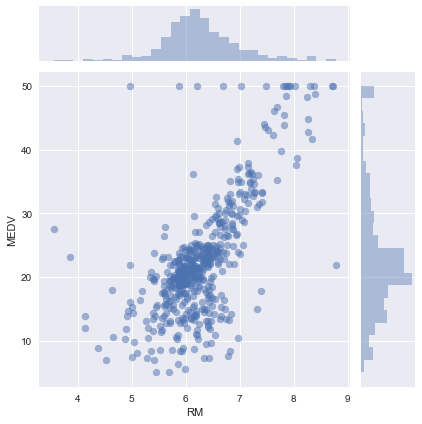

In [13]:
sns.jointplot(data["RM"], data["MEDV"], kind='scatter', joint_kws={'alpha':0.5});

Из диаграммы рассеяния видим, положительную линейную зависимость между переменными RM и MEDV - дома с большим числом комнат имеют более высокую цену

In [14]:
data[["RM", "MEDV"]].describe()

,RM,MEDV
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


Рассмотрим по другому признаку - низкому соц. статусу. Видим обратную зависимость

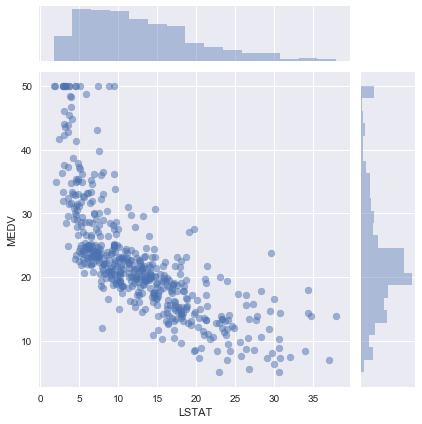

In [15]:
sns.jointplot(data["LSTAT"], data["MEDV"], kind='scatter', joint_kws={'alpha':0.5});

In [16]:
data[["RM", "MEDV"]].describe()

,RM,MEDV
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


### Задача - реализовать метод градиентного спуска со следующим интерфейсом:

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler


In [18]:
#Из векторов получаем матрицы и перемножаем их
# X.T - транспонирование матрицы
# @ - перемножение матриц

Метод fit обучает модель на данных ( X_train (матрица признаков) и y_train (вектор ответов))

Получаемый результат:
coef_ - вектор оценок для  θi  ( i  принимает значения от 1 до p, где p - это количество признаков) 
и intercept_ - оцененное значение для  θ0 
predict возвращает вектор прогнозов для новых данных

In [19]:
class GDRegressor:

    def __init__(self, alpha=0.01, n_iter=100):
        self.alpha = alpha
        self.n_iter = n_iter

    def fit(self, X, y): 
        #X = X.copy()
        #X.insert(0, "Ones", np.ones(len(X)))
        X = np.hstack([np.ones((len(X), 1)), X])
        theta = np.zeros(X.shape[1])
        self.theta_history = theta.copy()
        m = len(X)

        for i in range(self.n_iter):
            error = (X @ theta) - y
            gradient = (1/m) * (X.T @ error)
            theta -= self.alpha * gradient
            self.theta_history = np.vstack([self.theta_history, theta])
        
        self.theta = theta
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]

    def predict(self, X_test):
        #X_test = X_test.copy()
        #X_test.insert(0, "Ones", np.ones(len(X_test)))
        X_test = np.hstack([np.ones((len(X_test), 1)), X_test])
        return X_test.dot(self.theta)

Разобьем выборку на обучающую и тестовую и обучим модель на обучающей выборке, положив значения для параметров max_iter=2000 и alpha=0.04

In [20]:
X = data[["RM"]]
y = data["MEDV"]

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.04, n_iter=2000)
%time model.fit(X_train, Y_train)

Wall time: 528 ms


In [22]:
model.coef_, model.intercept_

(array([7.07554766]), -21.79244730287655)

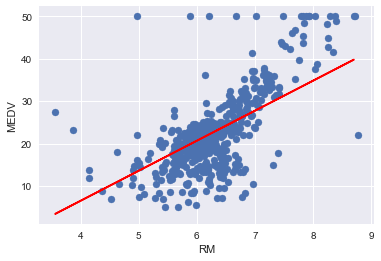

In [23]:
plt.scatter(data["RM"], data["MEDV"])
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.plot(X_train, model.coef_[0] * X_train + model.intercept_, 'r');

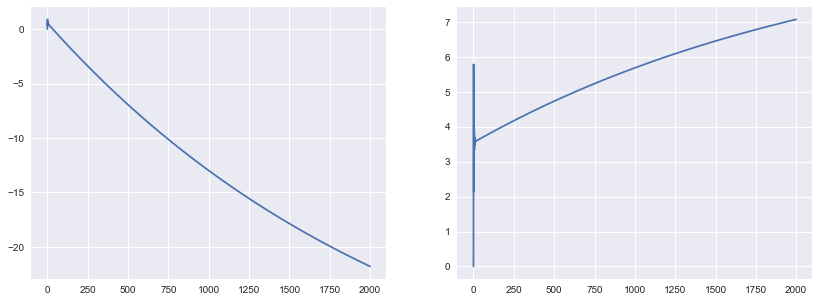

In [24]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(list(range(model.n_iter+1)), model.theta_history[:, 0])
plt.subplot(122)
plt.plot(list(range(model.n_iter+1)), model.theta_history[:, 1]);

## Оценка качества


###### Вычисление коэфиициента детерминации

Коэффициент детерминации - это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью.Более точно — это единица минус доля необъяснённой дисперсии (дисперсии случайной ошибки модели, или условной по признакам дисперсии зависимой переменной) в дисперсии зависимой переменной.

In [25]:
def r_squared(y_hat, y):
    """ R squared """
    return 1.0 - sum((y - y_hat)**2) / sum((y - np.mean(y))**2)


###### Вычисление среднеквадратичной ошибки

Среднеквадратичная ошибка характеризует отклонение реальных данных от линии регрессии и измеряется в тех же единицах, что и зависимая переменная (y).

In [26]:
def rmse(y_hat, y):
    """ Root mean squared error """
    errors = y_hat - y
    total_error = np.dot(errors, errors)
    return np.sqrt(total_error/len(y_hat))

In [27]:
Y_pred = model.predict(X_test)

In [28]:
rmse(Y_pred, Y_test), r_squared(Y_pred, Y_test)

(6.500256917031143, 0.48822629468823386)

Построим график истинных значений и прогнозов:

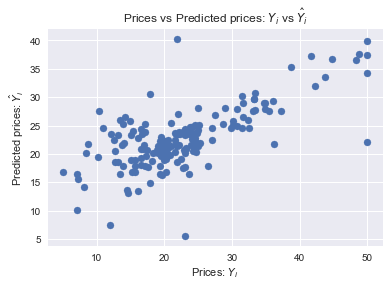

In [29]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$");

Также построим график остатков (residual plot):

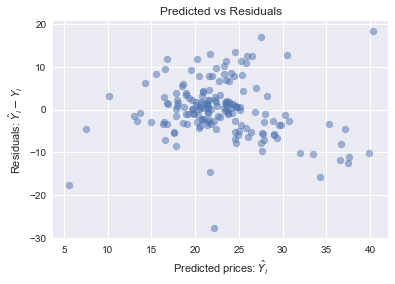

In [30]:
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Residuals: $\hat{Y}_i - Y_i$")
plt.title("Predicted vs Residuals");
plt.scatter(Y_pred, (Y_pred-Y_test), alpha=0.5);

Улучшим качество модели - выберем значения для параметров max_iter и alpha не случайно. Используем функцию plot_cost_function для того, чтобы найти оптимальные значения для числа итераций max_iter и параметра alpha.

In [31]:
def plot_cost_function(X, y, estimator=None, max_iters=100, eta0=0.01, params=None, normalize=False):
    if estimator is SGDRegressor:
        if not params:
            params = {
                'loss': 'squared_loss',
                'penalty': 'none',
                'learning_rate': 'constant',
            }
        else:
            params.update(params)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)
    
    if normalize:
        X_train = StandardScaler().fit_transform(X_train)
        Y_train = StandardScaler().fit_transform(Y_train.values.reshape(-1, 1))
        X_test = StandardScaler().fit_transform(X_test)
        Y_test = StandardScaler().fit_transform(Y_test.values.reshape(-1, 1))
    
    cost_history = []
    for it in range(5, max_iters, round(max_iters * 0.01)):
        if estimator is SGDRegressor:
            model = estimator(max_iter=it, eta0=eta0, **params)
        else:
            model = estimator(n_iter=it, alpha=eta0)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        mse = mean_squared_error(Y_test, Y_pred)
        cost_history.append([it, mse])
    
    iterations, errors = list(zip(*cost_history))
    plt.plot(iterations, errors, '-')
    plt.xlabel("#Iteration")
    plt.ylabel("MSE")

Wall time: 21.1 s


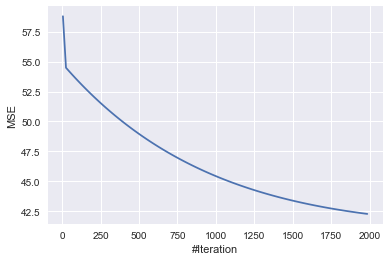

In [32]:
%time plot_cost_function(X, y, GDRegressor, max_iters=2000, eta0=0.04)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.03, n_iter=5000)
%time model.fit(X_train, Y_train)

Wall time: 1.36 s


In [34]:
Y_pred = model.predict(X_test)
rmse(Y_pred, Y_test), r_squared(Y_pred, Y_test)

(6.433178682170758, 0.4987341105773805)

In [35]:
X_filtered = data[(data["MEDV"] < 50)][["RM"]]
y_filtered = data[(data["MEDV"] < 50)]["MEDV"]

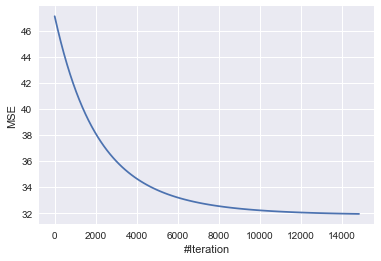

In [36]:
plot_cost_function(X_filtered, y_filtered, GDRegressor, max_iters=15000, eta0=0.03)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered, y_filtered, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.03, n_iter=10000)
%time model.fit(X_train, Y_train)

Wall time: 2.1 s


In [38]:
Y_pred = model.predict(X_test)
rmse(Y_pred, Y_test), r_squared(Y_pred, Y_test)

(5.6760810582611105, 0.5487993200820729)

Нормализация

In [39]:
def z_scaler(feature):
    return (feature - feature.mean()) / feature.std()
X_scaled = z_scaler(X_filtered)
y_scaled = z_scaler(y_filtered)

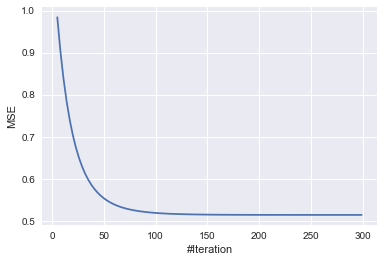

In [40]:
plot_cost_function(X_scaled, y_scaled, GDRegressor, max_iters=300, eta0=0.04)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.04, n_iter=300)
model.fit(X_train, Y_train)

In [42]:
Y_pred = model.predict(X_test)
rmse(Y_pred, Y_test), r_squared(Y_pred, Y_test)

(0.7176698393976925, 0.5537762725222082)

## Пример с использованием библиотеки sklearn

###### Задание: 

Проделайте те же шаги с использованием библиотеки sklearn: с помощью функции plot_cost_function с параметром normalize=True найдите оптимальное число итераций и значение для скорости обучения, вычислите значение среднеквадратичной ошибки и коэффициента детерминации, постройте графики остатков.

Для того, чтобы построить модель:

In [43]:
from sklearn.linear_model import SGDRegressor

In [44]:
model = SGDRegressor(loss='squared_loss', penalty='none', learning_rate='constant', max_iter=80, eta0=0.0001)
model.fit(X_train, Y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=80,
             n_iter_no_change=5, penalty='none', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [45]:
Y_pred = model.predict(X_test)

In [46]:
mean_squared_error(Y_test, Y_pred)

0.5930566020471356

In [47]:
r2_score(Y_test, Y_pred)

0.4861937124500877

Удалось увеличить качество модели - уменьшилась MSE

## Многомерная линейная регрессия

До этого мы рассматривали только один признак - среднее число комнат на участке. Добавим в модель еще один признак - процент жителей с низким социальным статусом (LSTAT).

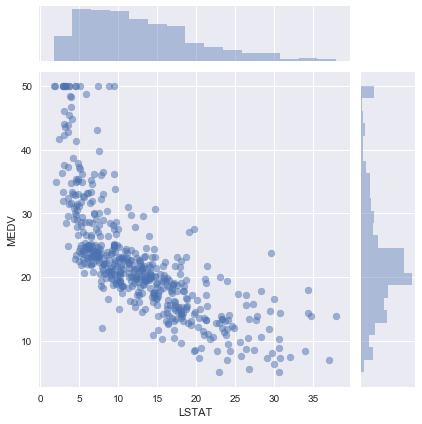

In [48]:
sns.jointplot(data["LSTAT"], data["MEDV"], kind='scatter', joint_kws={'alpha':0.5});

Снова воспользуемся функцией plot_cost_function:

In [49]:
X_filtered = data[(data["MEDV"] < 50)][["RM", "LSTAT"]]
y_filtered = data[(data["MEDV"] < 50)]["MEDV"]


In [50]:
# скорость обучения задаётся с помощью параметра eta0, max_iters - количество итераций (методом подбора)

C:\Users\123\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\123\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\123\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\123\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning

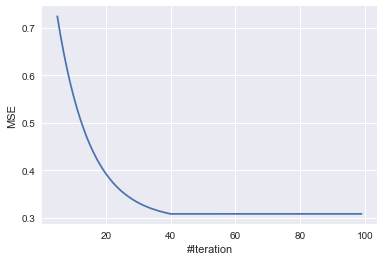

In [51]:
plot_cost_function(
    X_filtered,
    y_filtered,
    estimator=SGDRegressor,
    normalize=True,
    max_iters=100,
    eta0=0.0001
)

Постройте и обучите модель для найденных значений max_iter и alpha. Вы должны получить следующие значения для среднеквадратичной ошибки и коэффициента детерминации:

(0.29456340651451396, 0.7054365934854863)

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered, y_filtered, test_size=0.33, random_state=18)
X_train = StandardScaler().fit_transform(X_train)
Y_train = StandardScaler().fit_transform(Y_train.values.reshape(-1, 1))
X_test = StandardScaler().fit_transform(X_test)
Y_test = StandardScaler().fit_transform(Y_test.values.reshape(-1, 1))
model = SGDRegressor(loss='squared_loss', penalty='none', learning_rate='constant', max_iter=300, eta0=0.0001)
model.fit(X_train, Y_train)

C:\Users\123\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=300,
             n_iter_no_change=5, penalty='none', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
model.coef_, model.intercept_

(array([ 0.33332356, -0.43927416]), array([3.97940464e-05]))

In [54]:
Y_pred = model.predict(X_test)

In [55]:
mean_squared_error(Y_test, Y_pred), r2_score(Y_test, Y_pred)

(0.3087158558256287, 0.6912841441743715)

Добавление нового признака значительно снизило среднеквадратичную ошибку и повысило описательную способность нашей модели. Построим график остатков:

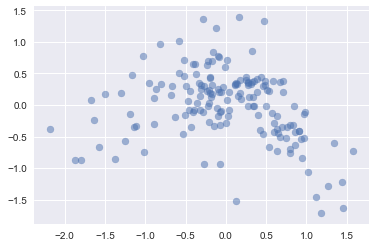

In [56]:
plt.scatter(Y_pred, (Y_pred - Y_test.ravel()), alpha=0.5);

Из графика хорошо видно, что есть нелинейная зависимость в остатках. Это связано с тем, что процент жителей с низким социальным статусом нелинейно зависит от средней цены на дом и среднего числа комнат:


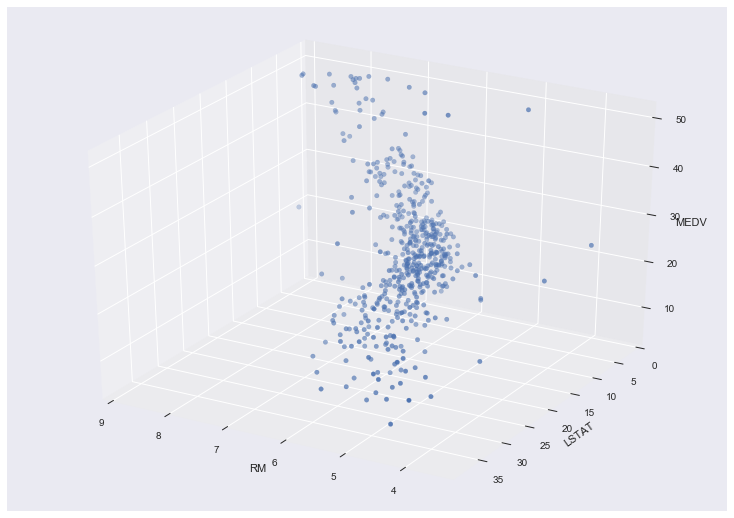

In [57]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = Axes3D(fig)
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV');
ax.view_init(azim=120)
ax.scatter3D(data["RM"], data["LSTAT"], data["MEDV"])
plt.show()

## Добавление полиномиальных признаков


Для описания нелинейной зависимости мы будем использовать полиномиальную модель. Предположим, что полинома четвертой степени достаточно для описания зависимости. Возможно будет достаточно полинома второй или третьей степени, поэтому, чтобы «занулить» некоторые коэффициенты θ, мы будем использовать L1-регуляризацию.

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4, include_bias=False)
X = poly.fit_transform(X_filtered)

C:\Users\123\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\123\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\123\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\123\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = 

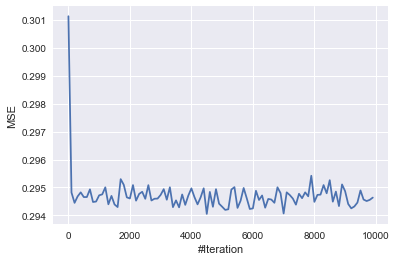

In [59]:
plot_cost_function(
    X_filtered,
    y_filtered,
    SGDRegressor,
    normalize=True,
    max_iters=10000, 
    eta0=0.005,      
    params={
        'penalty': 'l1',
        'alpha': 0.01
    }
)

Постройте и обучите модель для найденных значений max_iter и alpha. Вы должны получить примерно следующие значения для среднеквадратичной ошибки и коэффициента детерминации:


(0.17508905829300977, 0.8249109417069903)

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered, y_filtered, test_size=0.33, random_state=18)
X_train = StandardScaler().fit_transform(X_train)
Y_train = StandardScaler().fit_transform(Y_train.values.reshape(-1, 1))
X_test = StandardScaler().fit_transform(X_test)
Y_test = StandardScaler().fit_transform(Y_test.values.reshape(-1, 1))
model = SGDRegressor(loss='squared_loss', penalty='l1', alpha=0.01, learning_rate='constant', max_iter=10000, eta0=0.002)
model.fit(X_train, Y_train)

C:\Users\123\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.002, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [61]:
Y_pred = model.predict(X_test)
mean_squared_error(Y_test, Y_pred), r2_score(Y_test, Y_pred)

(0.2965530746003041, 0.703446925399696)

Значительно снизили значение среднеквадратичной ошибки и повысили описательную способность нашей модели. Посмотрим на график остатков:

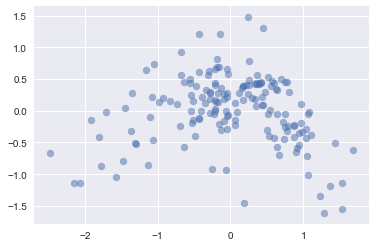

In [62]:
plt.scatter(Y_pred, (Y_pred-Y_test.reshape(1, -1)), alpha=0.5);

In [63]:
model.coef_, model.intercept_


(array([ 0.31754422, -0.55101323]), array([0.003846]))